# Trabajo Practico Final

El objetivo de este trabajo práctico es analizar las particularidades de la utilización de
algoritmos para la generación de modelos de aprendizaje automático.

Fechas de entrega obligatoria:  
- 01/8/2023 a las 23:59 hs.

Importante: las entregas obligatorias, deben efectuarse a través del campus la UnaHur.

La entrega será individual, en formato de Nootebook. La cual debe presentar un formato prolijo con todas las notas explicativas que considere pertinentes. Al mismo tiempo, debe entregar un set de datos, producto de las transformaciones realizadas hasta el punto 4.

El nombre del archivo deberá respetar el siguiente formato: "APELLIDO_NOMBRE_TP_AA_2023.ipynb"

## Generar Data Frame

Previa conexion a Mi Drive:
- A partir del set de datos insurance_aa_2023.csv generar el data frame "data".

EL objetivo de este trabajo práctico será predecir el costo médico de personas en EE.UU. utilizando los distintos modelos vistos en el curso. Podrán encontrar más información sobre el dataset [aqui](https://www.kaggle.com/datasets/mirichoi0218/insurance?select=insurance.csv).

## Exploración del dataset

1. A partir de los datos entregados, describir los atributos realizando una breve explicación de qué representan y del tipo de variable (categórica, numérica u ordinal). En caso de que haya variables no numéricas, reportar los posibles valores que toman y cuán frecuentemente lo hacen.
  - Ver los primeros seis registros
  - Ver el tamaño del dataset
  - Ver los tipos de datos de cada columna
  - Usar el método *describe()* para ver las variables numéricas

2. Verificar la existencia de valores faltantes. Si los hay, ¿cuántos son y en qué atributos se encuentran? En caso de haberlos, realice la imputación de los mismos.

3. Estandarizar las variables numéricas (con excepción de _charges_ que es la variable a predecir).

4. Usar el metodo _get_dummies()_ para reemplazar las variables categóricas

## Modelos

5. Dividir el dataset en un conjunto de entrenamiento(90%) y uno de testeo (10%).

6. Realizar: (a) un modelo de regresión lineal; (b) modelo de árboles de decisión y (c) random forest. En todos los casos elija un hiperparámetro para ajustar utilizando **cross-validation**. ¿Cuáles fueron las variables más importantes para cada uno de los modelos?

7. Mencione la forma en la que se controló el overfitting en cada uno de los modelos realizados en el punto anterior.

8. Compare los modelos realizados. ¿Cuál considera que obtuvo un mejor resultado?

# Solución

Carga del archivo desde el drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta = '/content/drive/MyDrive/'

filename = ruta + 'insurance_aa_2023.csv'

Carga de librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

generacion del dataframe:

In [ ]:
data = pd.read_csv(filename)

## Exploración del dataset

### 1)

In [ ]:
data.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [ ]:
data.shape

(1338, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1320 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe(include="all") #incluyo tambien las variables categoricas

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1320,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,361,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


### Bonus track- gráficos:

Grafico de dispersión: costos vs edad

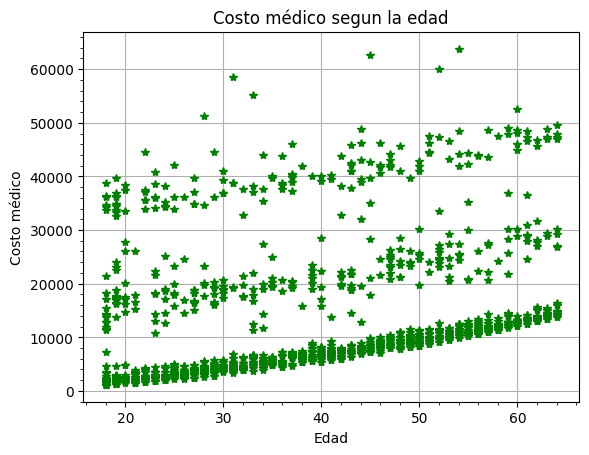

In [ ]:
#en los parametros podemos crear:
#el nombre de la legenda, color de las lineas, marcadores, estilo de linea:
plt.plot(data['age'], data['charges'], color="green", marker="*", linestyle=" ")


#titulo
plt.title("Costo médico segun la edad")

#etiquetas de los ejes
plt.xlabel("Edad")
plt.ylabel("Costo médico")


#activar cuadricula:
plt.grid()

#activar pequeños ticks:
plt.minorticks_on()

plt.show()

Graficamos el costo medico promedio por sexo:

In [ ]:
promedio_costo_sexo = data.groupby("sex").mean()
promedio_costo_sexo

<ipython-input-12-8649b6ae0a0e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  promedio_costo_sexo = data.groupby("sex").mean()


,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


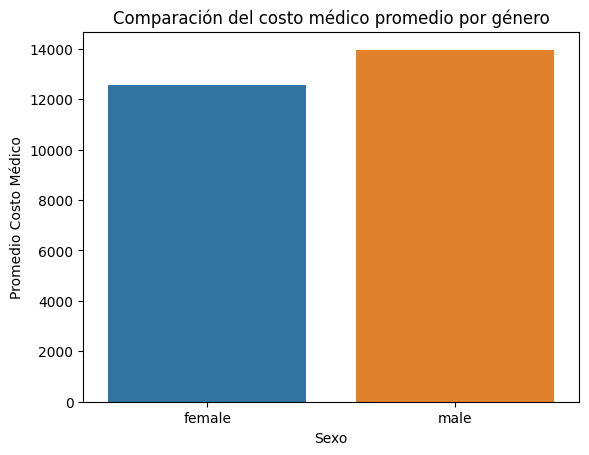

In [ ]:

promedio_costo_sexo = pd.DataFrame({'Sexo': ['female', 'male'],'Promedio Costo Médico': [12569, 13956]})


sns.barplot(x="Sexo", y="Promedio Costo Médico", data=promedio_costo_sexo)
plt.xlabel('Sexo')
plt.ylabel('Promedio Costo Médico')
plt.title('Comparación del costo médico promedio por género')
plt.show()

Porcentaje de grupos de edades en la muestra:

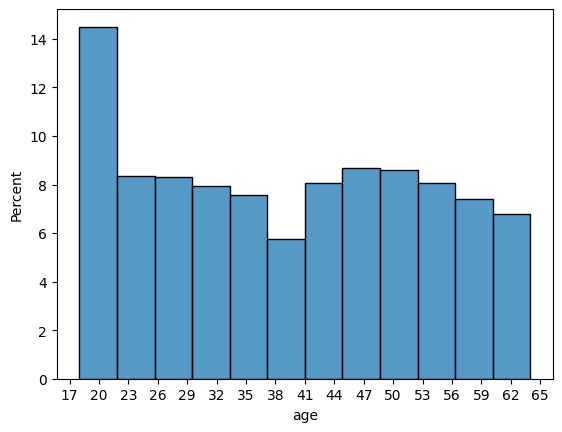

In [ ]:
sns.histplot(data=data, x="age", stat="percent")

plt.xticks(range(17, 66, 3))  # Establece los años de 17 a 66 con incrementos de 3

plt.show()

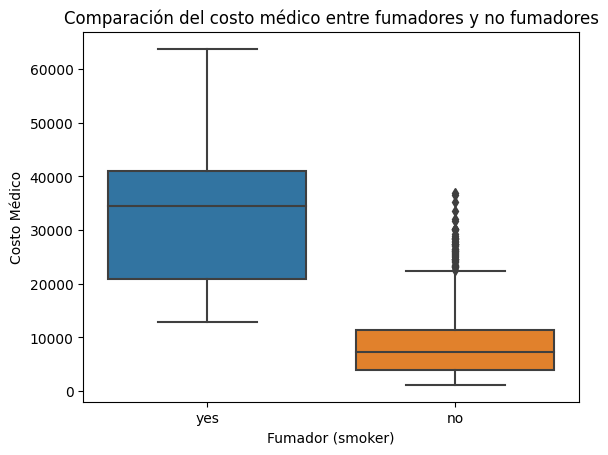

In [ ]:
sns.boxplot(x='smoker', y='charges', data=data)
plt.xlabel('Fumador (smoker)')
plt.ylabel('Costo Médico')
plt.title('Comparación del costo médico entre fumadores y no fumadores')
plt.show()

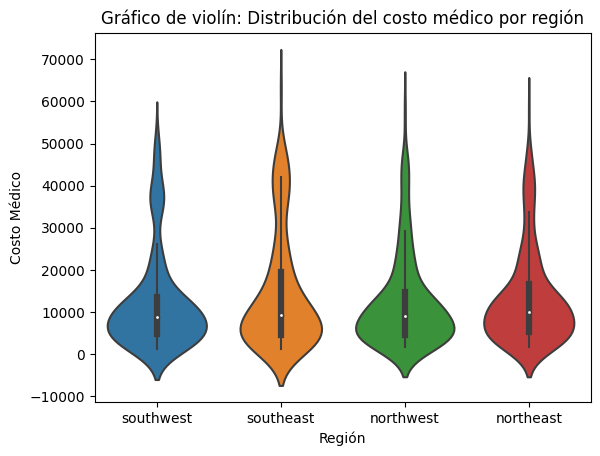

In [ ]:
sns.violinplot(x='region', y='charges', data=data)
plt.xlabel('Región')
plt.ylabel('Costo Médico')
plt.title('Gráfico de violín: Distribución del costo médico por región')
plt.show()

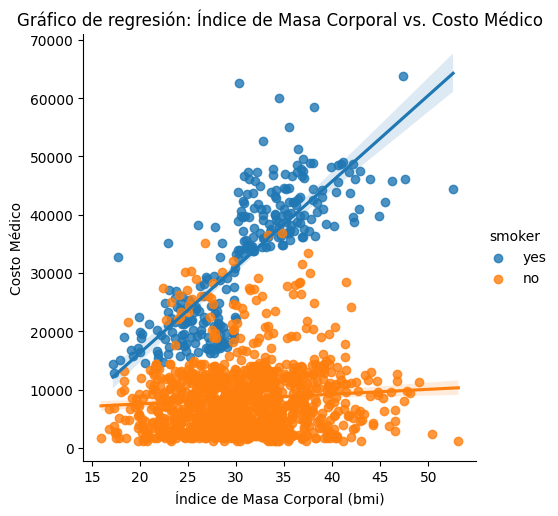

In [ ]:
sns.lmplot(x='bmi', y='charges', data=data, hue = 'smoker')
plt.xlabel('Índice de Masa Corporal (bmi)')
plt.ylabel('Costo Médico')
plt.title('Gráfico de regresión: Índice de Masa Corporal vs. Costo Médico')
plt.show()

Mapa de correlaciones (heatmap) con los datos númericos originales:

<ipython-input-18-fb668e1d8b8d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


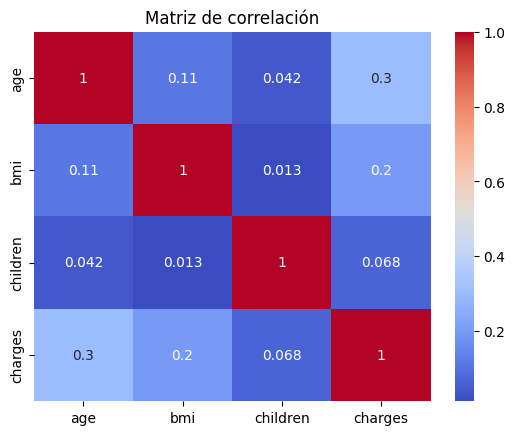

In [ ]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

no encontramos en las variables númericas originales una correlación fuerte.

### 2)

Sumamos la cantidad de datos faltantes en cada columna:

In [ ]:
data.isna().sum()

age          0
sex          0
bmi          0
children     0
smoker       0
region      18
charges      0
dtype: int64

vemos que la variable "Region" tiene 18 datos faltantes. Vamos a completar estos datos faltantes con el valor mas frecuente de la columna, a saber: "southeast".

In [ ]:
data['region'].value_counts()

southeast    361
southwest    321
northeast    321
northwest    317
Name: region, dtype: int64

Imputaremos los datos faltantes a traves de SimpleImputer:

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
#Creamos un objeto SimpleImputer con la estrategia elegida
imputer = SimpleImputer(missing_values = np.nan,
                        strategy ='most_frequent')
# Ajustamos los datos al objeto imputer (en este caso sería calcular el valor mas frecuente de la columna)
imputer = imputer.fit(data)

#Guardamos los nombres de las columnas
col = data.columns

# Imputamos los datos faltantes
data = pd.DataFrame(imputer.transform(data), columns=col)

verificamos si se eliminaron los datos faltantes:

In [ ]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Comentario sobre el problema de la transformacion del tipo de datos despues de la imputacion

como se dijo en la clase de preguntas, el imputador transforma en tipo objeto todas las columnas. Sin embargo no tuve problemas para seguir preprocesando el material.

In [ ]:
data.dtypes

age         object
sex         object
bmi         object
children    object
smoker      object
region      object
charges     object
dtype: object

En otra notebook, he cambiado el codigo de imputacion realizado más arriba por el que se propuso en clase: (esta puesto como comentario para evitar que se ejecute)

In [ ]:
# Creamos un objeto SimpleImputer con la estrategia elegida
#imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Convertimos la columna "region" en un array 2D
#region_column = data['region'].values.reshape(-1, 1)

# Ajustamos los datos al objeto imputer (en este caso sería calcular el valor mas frecuente de la columna)
#imputer = imputer.fit(region_column)

# Imputamos los datos faltantes en la columna "region"
#data['region'] = imputer.transform(region_column)

el resultado fue exactamente el mismo: mismo score y mismo MSE para los 3 modelos. Parece ser que estos modelos de sklearn admiten trabajar con tipo 'object'.

### 3)

Ahora estandarizaremos las variables numéricas

In [ ]:
from sklearn.preprocessing import StandardScaler

Seleccionamos las variables numericas con excepcion del target:

In [ ]:
col = ['age','bmi','children']

In [ ]:
data[col].head(4)

,age,bmi,children
0,19,27.9,0
1,18,33.77,1
2,28,33.0,3
3,33,22.705,0


In [ ]:
#Aplicamos la estandarizacion a las variables de interes
scaler = StandardScaler()
scaler = scaler.fit(data[col])
data[col] = scaler.transform(data[col])

vemos como quedaron escaladas nuestras variables:

In [ ]:
data[col].describe()

,age,bmi,children
count,1.338000e+03,1.338000e+03,1.338000e+03
mean,-1.805565e-16,-2.124194e-16,-5.576008e-17
std,1.000374e+00,1.000374e+00,1.000374e+00
min,-1.509965e+00,-2.412011e+00,-9.086137e-01
25%,-8.691547e-01,-7.164063e-01,-9.086137e-01
50%,-1.474046e-02,-4.320880e-02,-7.876719e-02
75%,8.396738e-01,6.611572e-01,7.510793e-01
max,1.765289e+00,3.685522e+00,3.240619e+00


### 4)

Codificaremos las variables categóricas:

para evitar columnas innecesarias vamos a utilizar el metodo .replace para codificar las columnas "age" y "smoker"

In [ ]:
#asignamos los nuevos valores a los valores originales:
reemplazo1 = {'male': 0,'female': 1,}
reemplazo2 = {'yes': 0,'no': 1,}

In [ ]:
#los reemplazamos en el dataframe
data['sex'].replace(reemplazo1, inplace=True)
data['smoker'].replace(reemplazo2, inplace=True)

In [ ]:
#chequeamos que este todo en orden:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,-0.908614,0,southwest,16884.924
1,-1.509965,0,0.509621,-0.078767,1,southeast,1725.5523
2,-0.797954,0,0.383307,1.580926,1,southeast,4449.462
3,-0.441948,0,-1.305531,-0.908614,1,northwest,21984.47061
4,-0.513149,0,-0.292556,-0.908614,1,northwest,3866.8552


Ahora transformamos en dummies la variable "region":

In [ ]:
data = pd.get_dummies(data, columns=["region"], prefix=["reg"])

In [ ]:
data.head()

,age,sex,bmi,children,smoker,charges,reg_northeast,reg_northwest,reg_southeast,reg_southwest
0,-1.438764,1,-0.453320,-0.908614,0,16884.924,0,0,0,1
1,-1.509965,0,0.509621,-0.078767,1,1725.5523,0,0,1,0
2,-0.797954,0,0.383307,1.580926,1,4449.462,0,0,1,0
3,-0.441948,0,-1.305531,-0.908614,1,21984.47061,0,1,0,0
4,-0.513149,0,-0.292556,-0.908614,1,3866.8552,0,1,0,0


In [ ]:
data.dtypes

age              float64
sex                int64
bmi              float64
children         float64
smoker             int64
charges           object
reg_northeast      uint8
reg_northwest      uint8
reg_southeast      uint8
reg_southwest      uint8
dtype: object

Exportamos el dataframe con el preprocesamiento de los datos:

In [ ]:
data.to_csv("data_preprocesada(Tomas_Tellechea)")

## Modelos

### 5)

importamos librerias:

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Dividimos el dataset en la proporción requerida:

In [ ]:
X = data.drop('charges', axis=1)
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### 6)

a. Modelo de regresión lineal

Para evitar el overfitting ajustaremos el modelo con la regresión Ridge haciendo Cross Validation:

In [ ]:

#Creamos un array de numpay que llegue hasta 0.99
array_alphas = np.arange(0.01, 1, 0.01)

#Modelo Ridge
reg_ridgeCV =RidgeCV(alphas=array_alphas, cv=5) #le pasamos el array y el numero de folds
reg_ridgeCV.fit(X_train, y_train)


RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
        cv=5)

In [ ]:
# Predicciones en el conjunto de testeo para Ridge
y_test_predicciones_ridgeCV = reg_ridgeCV.predict(X_test)

# Cálculo del error cuadrático medio en el conjunto de testeo
mse_ridgeCV = mean_squared_error(y_test, y_test_predicciones_ridgeCV)

R2 = r2_score(y_test,y_test_predicciones_ridgeCV) # R2

print("Mejor alpha encontrado:", reg_ridgeCV.alpha_)
print("Error cuadrático medio (RidgeCV):", mse_ridgeCV)
print("R2 (RidgeCV):", R2)

Mejor alpha encontrado: 0.99
Error cuadrático medio (RidgeCV): 32350086.034541856
R2 (RidgeCV): 0.7655031282538034


Probamos tambien con la regresión Lasso:

In [ ]:
#Modelo Lasso
reg_lassoCV = LassoCV(alphas=array_alphas, cv=5)
reg_lassoCV.fit(X_train, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
        cv=5)

In [ ]:
# Predicciones en el conjunto de testeo para Lasso
y_test_prediccion_lassoCV = reg_lassoCV.predict(X_test)

# Cálculo del error cuadrático medio en el conjunto de testeo
mse_lassoCV = mean_squared_error(y_test, y_test_prediccion_lassoCV)

print("Mejor alpha encontrado:", reg_lassoCV.alpha_)
print("Error cuadrático medio (LassoCV):", mse_lassoCV)

Mejor alpha encontrado: 0.99
Error cuadrático medio (LassoCV): 32381499.563757624


b. Arbol de decisión. Elegiremos como hiperparámetro la profundidad del árbol:

In [ ]:
data.dtypes

age              float64
sex                int64
bmi              float64
children         float64
smoker             int64
charges           object
reg_northeast      uint8
reg_northwest      uint8
reg_southeast      uint8
reg_southwest      uint8
dtype: object

In [ ]:
from sklearn.tree import plot_tree

Hacemos CV buscando el mejor numero de profundidad:

In [ ]:
for i in range(2, 6, 1):

    # Creamos el modelo para un dado valor de i
    arbol = DecisionTreeRegressor(max_depth = i, random_state = 42)

    # Calculamos los scores al hacer cross-validation con 5 folds
    scores = cross_val_score(arbol, X_train, y_train, cv = 5)

    # Imprimimos el valor de alpha y el score medio
    print(f'profundidad {i} - Score medio = {scores.mean()}')

profundidad 2 - Score medio = 0.818884905830474
profundidad 3 - Score medio = 0.8365688784389909
profundidad 4 - Score medio = 0.8355792162240119
profundidad 5 - Score medio = 0.823934870141547


Creación del modelo con regularización óptima


In [ ]:
arbol_prof3 = DecisionTreeRegressor(max_depth = 3, random_state = 42)

# Entrenamiento
arbol_prof3.fit(X_train, y_train)

# Score en el set de testeo
score_in_test_arbol = arbol_prof3.score(X_test, y_test)
print(f'Score en el set de testeo: {score_in_test_arbol}')

Score en el set de testeo: 0.8562671535509654


Graficamos el árbol:

[Text(0.5, 0.875, 'smoker <= 0.5\nsquared_error = 147472873.803\nsamples = 1204\nvalue = 13321.097'),
 Text(0.25, 0.625, 'bmi <= -0.107\nsquared_error = 136212283.851\nsamples = 248\nvalue = 32061.297'),
 Text(0.125, 0.375, 'age <= 0.128\nsquared_error = 26469315.663\nsamples = 117\nvalue = 21221.021'),
 Text(0.0625, 0.125, 'squared_error = 12719331.761\nsamples = 69\nvalue = 18462.561'),
 Text(0.1875, 0.125, 'squared_error = 19573346.874\nsamples = 48\nvalue = 25186.306'),
 Text(0.375, 0.375, 'age <= 0.163\nsquared_error = 35537167.709\nsamples = 131\nvalue = 41743.07'),
 Text(0.3125, 0.125, 'squared_error = 20724007.646\nsamples = 71\nvalue = 38330.019'),
 Text(0.4375, 0.125, 'squared_error = 22969797.595\nsamples = 60\nvalue = 45781.847'),
 Text(0.75, 0.625, 'age <= 0.234\nsquared_error = 35655095.157\nsamples = 956\nvalue = 8459.622'),
 Text(0.625, 0.375, 'children <= -0.494\nsquared_error = 22038479.075\nsamples = 534\nvalue = 5421.203'),
 Text(0.5625, 0.125, 'squared_error = 1652

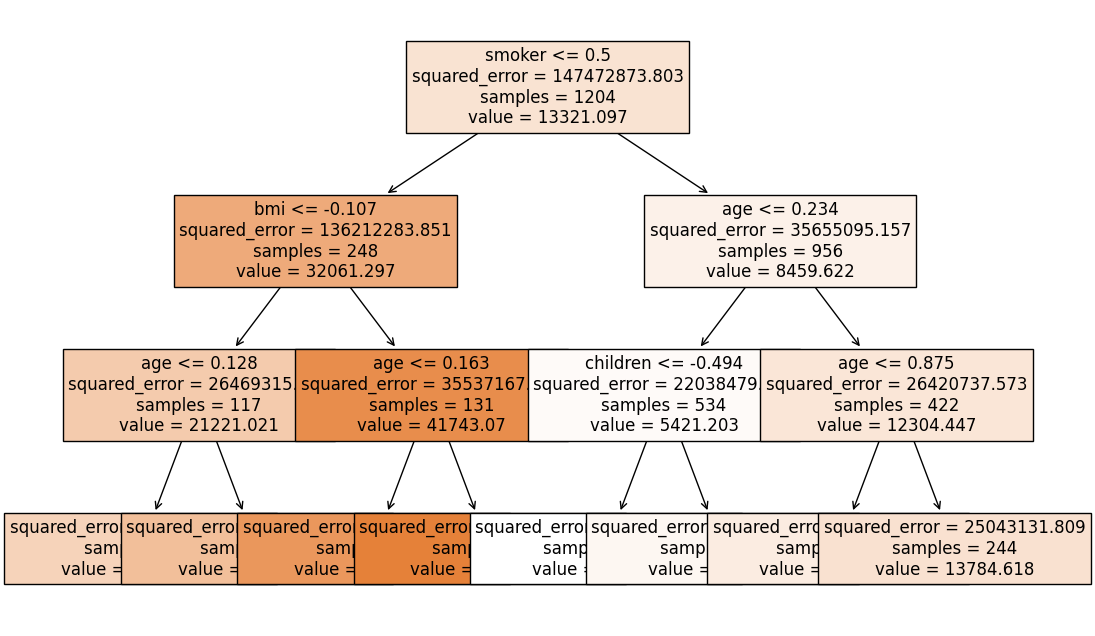

In [ ]:
features = X.columns

fig, ax = plt.subplots(figsize = (12, 8))

plot_tree(arbol_prof3, feature_names=features, fontsize = 12, filled = True, ax = ax)

c. Random Forest

In [ ]:
bosque = RandomForestRegressor(n_estimators=100, max_depth = 3, random_state = 42)

bosque.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=42)

In [ ]:
score_in_test_bosque = bosque.score(X_test, y_test)
print(f'Score en el set de testeo: {score_in_test_bosque}')

Score en el set de testeo: 0.8625874566162277


Veamos ahora que importancia se le ha dado a las distintas variables en cada modelo:

In [ ]:
#el coeficiente de cada feature en el Ridge:
print(f'Features: {features, reg_ridgeCV.coef_}')


Features: (Index(['age', 'sex', 'bmi', 'children', 'smoker', 'reg_northeast',
       'reg_northwest', 'reg_southeast', 'reg_southwest'],
      dtype='object'), array([  3638.3008013 ,    253.22294388,   1969.37823723,    536.86149746,
       -23792.64820375,    444.44668107,     85.01832338,   -200.91634451,
         -328.54865995]))


graficado:

[Text(0, 0, 'age'),
 Text(1, 0, 'sex'),
 Text(2, 0, 'bmi'),
 Text(3, 0, 'children'),
 Text(4, 0, 'smoker'),
 Text(5, 0, 'reg_northeast'),
 Text(6, 0, 'reg_northwest'),
 Text(7, 0, 'reg_southeast'),
 Text(8, 0, 'reg_southwest')]

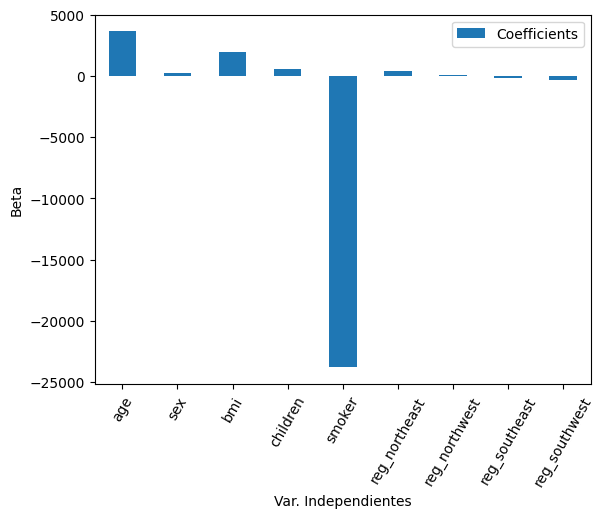

In [ ]:
coef = pd.DataFrame({"Feature":X_train.columns,"Coefficients":np.transpose(reg_ridgeCV.coef_)})

ax = coef.plot.bar()
ax.set_xlabel("Var. Independientes")
ax.set_ylabel("Beta")
ax.set_xticklabels(coef.Feature, rotation=60)

In [ ]:
#..y en el árbol y el bosque:

feature_importance_arbol = arbol_prof3.feature_importances_
feature_importance_bosque = bosque.feature_importances_

print(f'Features: {features}')
print(f'Importancia en Arbol de decision = {feature_importance_arbol}')
print(f'Importancia en Bosque aleatorio = {feature_importance_bosque}')

Features: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'reg_northeast',
       'reg_northwest', 'reg_southeast', 'reg_southwest'],
      dtype='object')
Importancia en Arbol de decision = [0.10195152 0.         0.17096949 0.00656834 0.72051065 0.
 0.         0.         0.        ]
Importancia en Bosque aleatorio = [0.10610333 0.         0.16976292 0.00434795 0.7197858  0.
 0.         0.         0.        ]


Podemos notar que en los 3 modelos la variable mas relevante es la de "smoker", lo cual tiene totalmente sentido, teniendo en cuenta que nuestra variable dependiente es el costo de un cliente de un seguro médico.

### 7)

El overfitting es un problema muy común a la hora de crear modelos de aprendizaje automático. Este fenómeno ocurre cuando el modelo se ajusta demasiado a los datos de entrenamiento y pierde la capacidad de generalizar en datos nuevos o desconocidos. En otras palabras, nuestro modelo va a tener un nivel de varianza alto.

El primer paso para evitar el overfitting es separar nuestros datos en datos de entrenamiento y testeo.

Además he utilizado en la regresión lineal, la regularización Ridge.

En el árbol de decisión, hemos probado con un rango acotado de nivel de profundidad, (una profundidad sin limite llevaría irremediablemente al overfitting).

Random Forest es un modelo que ya de por sí, evita el overfitting ya que compara una gran cantidad de árboles de decisión.

En los tres modelos aplicamos Cross Validation para robustecer aún más nuestro modelo en relación a este tema.

### 8)

Comparemos los MSE de cada modelo:

In [ ]:
# Aislamos las predicciones del modelo de arbol y bosque para compararlas con el "y_test":

y_prediccion_arbol = arbol_prof3.predict(X_test)

y_prediccion_bosque = bosque.predict(X_test)


In [ ]:
mse_ridge = mean_squared_error(y_test, y_test_predicciones_ridgeCV)
mse_arbol = mean_squared_error(y_test, y_prediccion_arbol)
mse_bosque = mean_squared_error(y_test, y_prediccion_bosque)


print(f'Error Cuadrático Medio (Ridge): {mse_ridge}')
print(f'Error Cuadrático Medio (Arbol): {mse_arbol}')
print(f'Error Cuadrático Medio (Bosque Aleatorio): {mse_bosque}')


Error Cuadrático Medio (Ridge): 32350086.034541856
Error Cuadrático Medio (Arbol): 19828707.794654336
Error Cuadrático Medio (Bosque Aleatorio): 18956788.49610219


Comparamos los scores de cada modelo:

In [ ]:
print(f"Score en el set de testeo (Regresión Ridge): {R2}")
print(f'Score en el set de testeo(árbol de decisión): {score_in_test_arbol}')
print(f'Score en el set de testeo (bosque aleatorio): {score_in_test_bosque}')


Score en el set de testeo (Regresión Ridge): 0.7655031282538034
Score en el set de testeo(árbol de decisión): 0.8562671535509654
Score en el set de testeo (bosque aleatorio): 0.8625874566162277


Conclusión: de los 3 modelos creados, el bosque aleatorio ha sido el que ha dado mejor resultado.
